In [1]:
# импортируем библиотеки:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# значения независимого признака (номера месяцев от 1 до 30)
x = np.arange(1, 31)

In [3]:
# генерация 30 случайных дробных чисел от 0 до 3:
rdm = np.array([np.random.uniform(0, 3) for _ in range(30)])
# значения зависимого признака:
y = rdm * 3 + x + 5

In [4]:
# параметры линейной регрессии:
a, b = np.polyfit(x, y, 1)

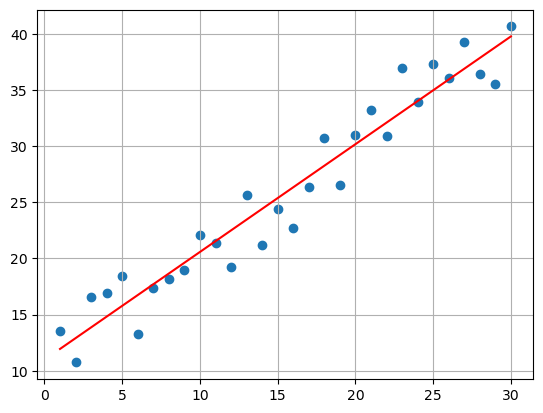

In [5]:
# график линейной регрессии и точечная диаграмма:
plt.plot(x, a * x + b, color='red')
plt.scatter(x, y)
# сетка:
plt.grid(True)

In [6]:
# функция, возвращающая сумму квадратов случайных остатков (?):
f = lambda a, b: sum((y - a * x - b) ** 2)

In [7]:
# функции, возвращающие частные производные по a и b соответственно:
da = lambda a, b: -2 * x * (b - a * x + y)
db = lambda a, b: 2 * (b - a * x + y)

In [8]:
# функция, возвращающая набор частных производных по a и b (градиент?) соответственно:
def df(a, b):
    i = np.random.randint(0, len(x))
    point = np.array([da(a, b)[i], db(a, b)[i]])
    return point

In [9]:
# стартовые значения параметров:
w0 = np.array([0, 0])
res = []
lam = 0.00001

In [10]:
# непосредственное осуществление алгоритма стохастического градиентного спуска:
while True:
    res.append(w0)
    w1 = w0 - lam * df(w0[0], w0[1])
    if np.linalg.norm(w1 - w0) <= 0.0001:
        break
    w0 = w1

In [11]:
# преобразование списка в массив:
res = np.array(res)
# вывод массива:
res

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 4.71222256e-03, -4.28383869e-04],
       [ 6.06532216e-03, -7.66658769e-04],
       [ 1.32954310e-02, -1.21854057e-03],
       [ 3.01522251e-02, -1.95144466e-03],
       [ 5.02671763e-02, -2.64506367e-03],
       [ 5.45869578e-02, -3.07704182e-03],
       [ 7.10060326e-02, -3.79091464e-03],
       [ 7.23376492e-02, -4.12381878e-03],
       [ 8.29215421e-02, -4.71181283e-03],
       [ 8.71756015e-02, -5.13721877e-03],
       [ 1.07130240e-01, -5.87627947e-03],
       [ 1.11335649e-01, -6.29682038e-03],
       [ 1.28565167e-01, -6.95949414e-03],
       [ 1.30865788e-01, -7.28815423e-03],
       [ 1.35023444e-01, -7.70391980e-03],
       [ 1.39172701e-01, -8.11884551e-03],
       [ 1.45367242e-01, -8.59534868e-03],
       [ 1.46331849e-01, -8.91688447e-03],
       [ 1.49056860e-01, -9.25751081e-03],
       [ 1.51337077e-01, -9.58325611e-03],
       [ 1.73003641e-01, -1.03054749e-02],
       [ 1.82932993e-01, -1.08571056e-02],
       [ 1.

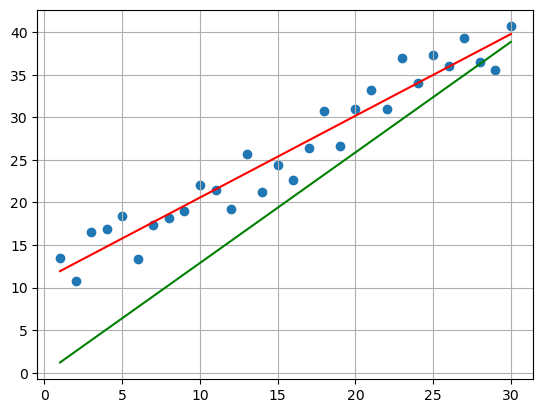

In [12]:
# графики:
plt.plot(x, a * x + b, color='red')
plt.scatter(x, y)
plt.plot(x, w0[1] + w0[0] * x, color="green")

plt.grid(True)

In [13]:
# сумма квадратов случайных остатков для параметров, полученных с помощью np.polyfit():
f(a, b)

141.16436630381375

In [14]:
# сумма квадратов случайных остатков для параметров, полученных с помощью стохастического градиентного спуска:
f(w0[0], w0[1])

1414.5494119090313